<a href="https://colab.research.google.com/github/shashanks33/ML-Prac/blob/master/Fashion_Mnist/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Use tf.data to batch and shuffle the dataset.
# train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(10000).batch(64)
# test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images, test_images = train_images / 255.0, test_images / 255.0

# Build model
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# # model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(10, activation='softmax'))

model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=None),
                             tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

# Train model
model.fit(train_images, train_labels,epochs=15)


4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7386 - accuracy: 0.7236
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6567 - accuracy: 0.8041
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6311 - accuracy: 0.8294
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6231 - accuracy: 0.8374
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6165 - accuracy: 0.8441
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6121 - accuracy: 0.8489
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6107 - accuracy: 0.8499
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6084 - accuracy: 0.8522
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6085 - accuracy: 0.8520
Epoch 10/15
1875/18

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 1.6058 - accuracy: 0.8550

Test accuracy: 0.8550000190734863


In [0]:
predictions = model.predict(test_images)
print(predictions[0])
print("This images classifier is {np.argmax(predictions[0])}")

[2.4071974e-23 2.4888872e-35 2.5080692e-38 5.6731264e-30 0.0000000e+00
 5.0368820e-10 0.0000000e+00 5.1207780e-07 0.0000000e+00 9.9999952e-01]
This images classifier is {np.argmax(predictions[0])}


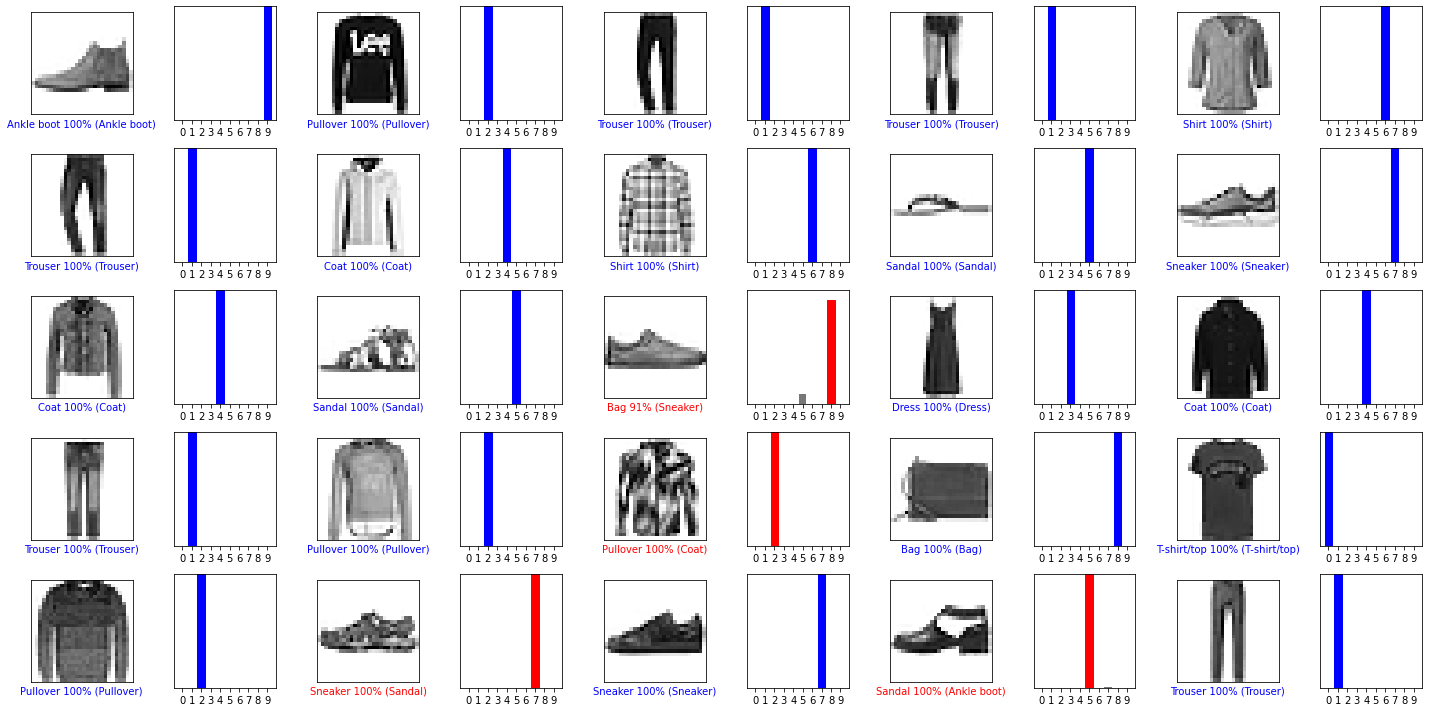

In [0]:
# Graph this to look at the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue') 
  
# plt.figure()
# plot_value_array(0, predictions, test_labels)
# _ = plt.xticks(range(10), class_names, rotation=45)
# plt.show()

# plt.figure()
# plot_value_array(12, predictions, test_labels)
# _ = plt.xticks(range(10), class_names, rotation=45)
# plt.show()

num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()